In [42]:
# EDA & Data Manipulation part 3
% 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [100]:
# read  and merge the data
path = '../../data/raw'
training_values = pd.read_csv(path + '/TrainingSetValues.csv')
training_labels = pd.read_csv(path + '/TrainingSetLabels.csv')
testing = pd.read_csv(path + '/TestSetValues.csv')

training = pd.merge(training_values, training_labels, how='inner', on='id')
print (list(training.columns.values)) # column names of df
training.head(5)

['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


EDA

(0) Missing Value

In [101]:
training.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [111]:
len(training['wpt_name'].unique())

37400

(1) Payment vs payment_type: same

In [102]:
training[['payment','payment_type']].drop_duplicates()

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
7,unknown,unknown
11,pay when scheme fails,on failure
12,other,other
13,pay monthly,monthly


In [103]:
training['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

(2). Water quality vs Quality group: same

In [104]:
training[['water_quality','quality_group']].drop_duplicates()

,water_quality,quality_group
0,soft,good
5,salty,salty
7,milky,milky
21,unknown,unknown
110,fluoride,fluoride
129,coloured,colored
277,salty abandoned,salty
6793,fluoride abandoned,fluoride


In [105]:
training['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [112]:
training['quality_group_new'] = training['quality_group']
training.loc[training['quality_group_new'].isin(['salty', 'milky', 'colored', 'fluoride']),'quality_group_new'] = 'bad'
training['quality_group_new'].value_counts()

good       50818
bad         6706
unknown     1876
Name: quality_group_new, dtype: int64

In [113]:
training.groupby(['quality_group_new','status_group']).size()

quality_group_new  status_group           
bad                functional                  3235
                   functional needs repair      378
                   non functional              3093
good               functional                 28760
                   functional needs repair     3904
                   non functional             18154
unknown            functional                   264
                   functional needs repair       35
                   non functional              1577
dtype: int64

In [114]:
training.groupby(['quality_group','status_group']).size()

quality_group  status_group           
colored        functional                   246
               functional needs repair       54
               non functional               190
fluoride       functional                   157
               functional needs repair       13
               non functional                47
good           functional                 28760
               functional needs repair     3904
               non functional             18154
milky          functional                   438
               functional needs repair       14
               non functional               352
salty          functional                  2394
               functional needs repair      297
               non functional              2504
unknown        functional                   264
               functional needs repair       35
               non functional              1577
dtype: int64

(3) Quantity vs Quantity Group: same

In [115]:
training[['quantity','quantity_group']].drop_duplicates()

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
3,dry,dry
4,seasonal,seasonal
21,unknown,unknown


In [116]:
training['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

(4) Source

In [117]:
training[['source', 'source_type', 'source_class']].drop_duplicates()

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
5,other,other,unknown
7,shallow well,shallow well,groundwater
16,river,river/lake,surface
66,hand dtw,borehole,groundwater
198,lake,river/lake,surface
3353,unknown,other,unknown


In [118]:
training.groupby(['source_class','source_type','source']).size()

source_class  source_type           source              
groundwater   borehole              hand dtw                  874
                                    machine dbh             11075
              shallow well          shallow well            16824
              spring                spring                  17021
surface       dam                   dam                       656
              rainwater harvesting  rainwater harvesting     2295
              river/lake            lake                      765
                                    river                    9612
unknown       other                 other                     212
                                    unknown                    66
dtype: int64

In [119]:
training.groupby(['source_class', 'status_group']).size()

source_class  status_group           
groundwater   functional                 24835
              functional needs repair     2741
              non functional             18218
surface       functional                  7266
              functional needs repair     1571
              non functional              4491
unknown       functional                   158
              functional needs repair        5
              non functional               115
dtype: int64

In [120]:
training['source'].value_counts()
training.loc[training['source'].isin(['hand dtw','lake','dam','other','unknown'])] = 'other'
training['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
other                    2573
rainwater harvesting     2295
Name: source, dtype: int64

(5) Waterpoint

In [121]:
training[['waterpoint_type','waterpoint_type_group']].drop_duplicates()

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
2,other,other
3,communal standpipe multiple,communal standpipe
6,hand pump,hand pump
24,improved spring,improved spring
828,cattle trough,cattle trough
5814,dam,dam


In [122]:
print(training['waterpoint_type'].value_counts())
training['waterpoint_type_new'] = training['waterpoint_type']
training.loc[training['waterpoint_type_new'].isin(['other','improved spring', 'cattle trough', 'dam']),'waterpoint_type_new'] = 'other'
training['waterpoint_type_new'].value_counts()

communal standpipe             27846
hand pump                      16700
other                           8708
communal standpipe multiple     5267
improved spring                  777
cattle trough                    101
dam                                1
Name: waterpoint_type, dtype: int64


communal standpipe             27846
hand pump                      16700
other                           9587
communal standpipe multiple     5267
Name: waterpoint_type_new, dtype: int64

In [86]:
training.groupby(['source_type', 'waterpoint_type']).size()

source_type           waterpoint_type            
borehole              cattle trough                     29
                      communal standpipe              3904
                      communal standpipe multiple     2765
                      hand pump                       4390
                      improved spring                    3
                      other                            858
dam                   cattle trough                     10
                      communal standpipe               273
                      communal standpipe multiple      319
                      dam                                6
                      hand pump                          8
                      other                             40
other                 cattle trough                      4
                      communal standpipe               122
                      communal standpipe multiple       26
                      hand pump                         44
      

In [99]:
training.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,waterpoint_type_new
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,communal standpipe multiple
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,communal standpipe multiple
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,communal standpipe


In [37]:
subset = training.loc[:,'payment':'waterpoint']
subset

,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,other,other,other,other,other,other,other,other,other,other,other,other
3,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,other,other,other,other,other,other,other,other,other,other,other,other
6,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [51]:
subset = subset.drop(['payment', 'water_quality', 'quantity', 'source_type', 'waterpoint_type','waterpoint_type_group'], axis=1)
subset.head(5)

,payment_type,quality_group,quantity_group,source,source_class,status_group
0,annually,good,enough,spring,groundwater,functional
1,never pay,good,insufficient,rainwater harvesting,surface,functional
2,other,other,other,other,other,other
3,never pay,good,dry,machine dbh,groundwater,non functional
4,never pay,good,seasonal,rainwater harvesting,surface,functional


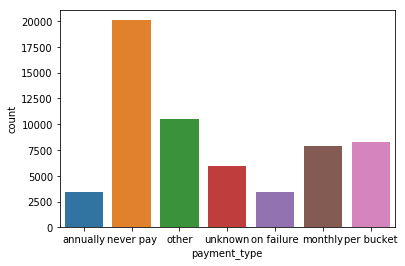

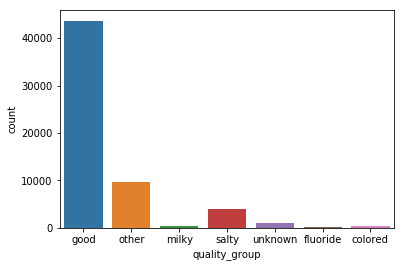

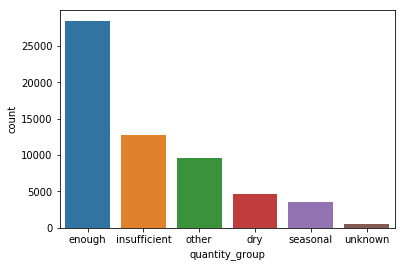

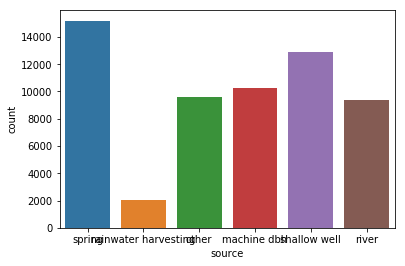

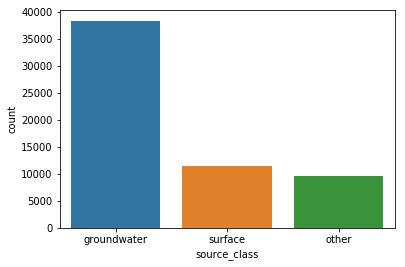

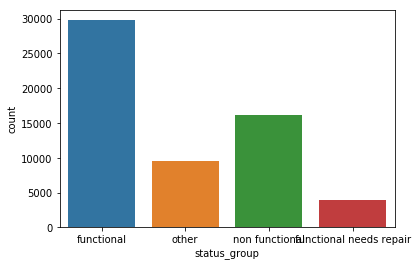

In [98]:
for i in range(0, len(subset.columns)):
    sns.countplot(data=subset,
                x=subset.columns[i])
    plt.show()

In [94]:
sns.countplot(data=subset,
                x=subset['payment_type'])
plt.show()

TypeError: Must pass values for either `x` or `y`

In [90]:
subset['payment_type']

0          annually
1         never pay
2             other
3         never pay
4         never pay
5             other
6         never pay
7           unknown
8         never pay
9         never pay
10            other
11       on failure
12            other
13          monthly
14        never pay
15        never pay
16          monthly
17       on failure
18            other
19         annually
20          monthly
21          unknown
22        never pay
23          monthly
24            other
25          unknown
26          monthly
27        never pay
28          monthly
29          monthly
            ...    
59370         other
59371     never pay
59372         other
59373      annually
59374         other
59375       monthly
59376         other
59377         other
59378       monthly
59379     never pay
59380      annually
59381     never pay
59382    per bucket
59383       unknown
59384     never pay
59385       monthly
59386     never pay
59387    per bucket
59388         other
